In [2]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data = pd.read_csv('weather.csv')

In [136]:
data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [4]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
data.shape

(100990, 20)

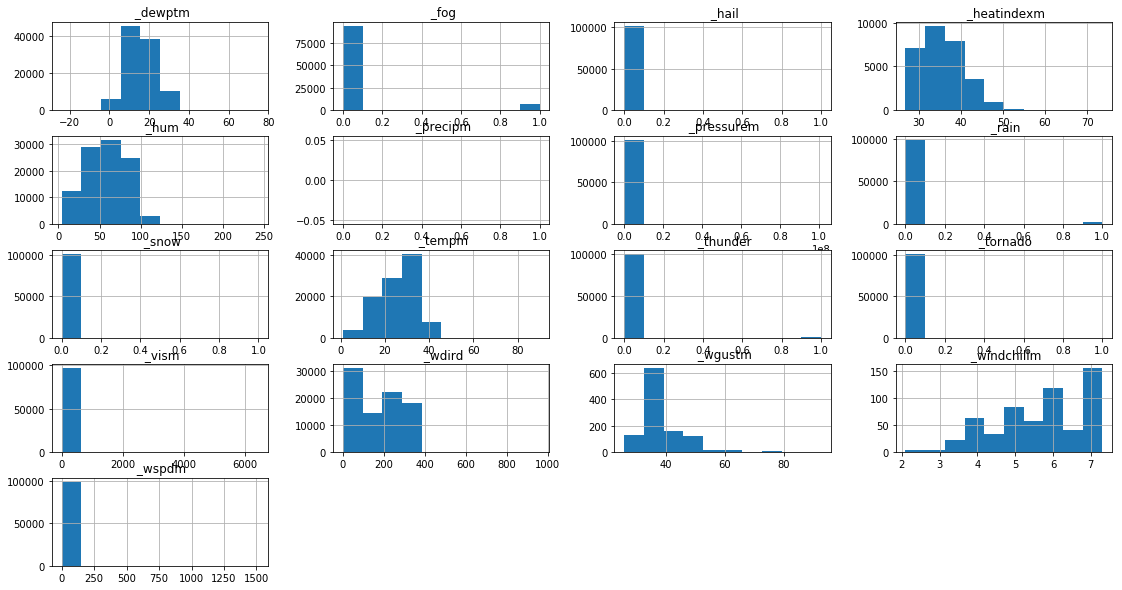

In [6]:
data.hist(figsize=(19,10))
plt.show()

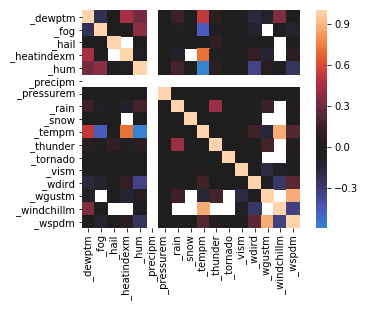

In [9]:
corr = data.corr()
sns.heatmap(corr,center=0, square=True)

In [99]:
data.columns = data.columns.str.strip()

In [74]:
y = data["_rain"] #target class

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 17 columns):
datetime_utc    100990 non-null object
_dewptm         100369 non-null float64
_fog            100990 non-null int64
_hail           100990 non-null int64
_heatindexm     29155 non-null float64
_hum            100233 non-null float64
_precipm        0 non-null float64
_pressurem      100758 non-null float64
_snow           100990 non-null int64
_tempm          100317 non-null float64
_thunder        100990 non-null int64
_tornado        100990 non-null int64
_vism           96562 non-null float64
_wdird          86235 non-null float64
_wgustm         1072 non-null float64
_windchillm     579 non-null float64
_wspdm          98632 non-null float64
dtypes: float64(11), int64(5), object(1)
memory usage: 13.1+ MB


In [75]:
X = data.drop(['_windchillm','_wgustm','_wdird','_precipm','_heatindexm','_conds','_rain','_conds','_wdire'],axis=1)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 12 columns):
datetime_utc    100990 non-null object
_dewptm         100369 non-null float64
_fog            100990 non-null int64
_hail           100990 non-null int64
_hum            100233 non-null float64
_pressurem      100758 non-null float64
_snow           100990 non-null int64
_tempm          100317 non-null float64
_thunder        100990 non-null int64
_tornado        100990 non-null int64
_vism           96562 non-null float64
_wspdm          98632 non-null float64
dtypes: float64(6), int64(5), object(1)
memory usage: 9.2+ MB


In [76]:
X['datetime_utc'] = pd.to_datetime(X['datetime_utc']) 
X.set_index('datetime_utc', inplace= True)

In [77]:
#data cleaning 
for i in X.columns:
    X[i].fillna(X[i].mean(), inplace=True)

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100990 entries, 1996-11-01 11:00:00 to 2017-04-24 18:00:00
Data columns (total 11 columns):
_dewptm       100990 non-null float64
_fog          100990 non-null int64
_hail         100990 non-null int64
_hum          100990 non-null float64
_pressurem    100990 non-null float64
_snow         100990 non-null int64
_tempm        100990 non-null float64
_thunder      100990 non-null int64
_tornado      100990 non-null int64
_vism         100990 non-null float64
_wspdm        100990 non-null float64
dtypes: float64(6), int64(5)
memory usage: 9.2 MB


In [78]:
#splitting the data

X_train = X[:50000]
y_train = y[:50000]
X_test = X[50000:len(X)-1]
y_test = y[50000:len(y)-1]

In [80]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [82]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [83]:
MLP.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [85]:
y_pred = MLP.predict(X_test)

In [86]:
y_pred = nm.array(y_pred)

In [87]:
y_test = nm.array(y_test)

In [88]:
score = 0
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        score = score + 1

In [89]:
(score/len(y_test))*100

97.47004255819883

In [109]:

from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(MLP, 'MLP.pkl') 
  
 


['MLP.pkl']

In [116]:
data[data['_rain']==1]

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
1656,19970119-00:00,Thunderstorms and Rain,10.0,0,0,NaN,94.0,NaN,1012.0,1,0,11.0,1,0,1.5,20.0,NNE,NaN,NaN,13.0
1657,19970119-01:00,Thunderstorms and Rain,11.0,0,0,NaN,100.0,NaN,-9999.0,1,0,11.0,1,0,1.2,80.0,East,NaN,NaN,5.6
1658,19970119-02:00,Thunderstorms and Rain,11.0,0,0,NaN,100.0,NaN,1012.0,1,0,11.0,1,0,0.8,60.0,ENE,NaN,NaN,5.6
1659,19970119-03:00,Thunderstorms and Rain,10.0,0,0,NaN,88.0,NaN,1013.0,1,0,12.0,1,0,0.8,100.0,East,NaN,NaN,18.5
1661,19970119-05:00,Rain,10.0,0,0,NaN,88.0,NaN,1012.0,1,0,12.0,0,0,1.5,100.0,East,NaN,NaN,33.3
1954,19970202-01:00,Light Rain,11.0,0,0,NaN,82.0,NaN,1007.0,1,0,14.0,0,0,1.2,100.0,East,NaN,NaN,14.8
1957,19970202-04:00,Light Rain,13.0,0,0,NaN,100.0,NaN,1009.0,1,0,13.0,0,0,0.8,100.0,East,NaN,NaN,9.3
1987,19970203-12:00,Light Rain,15.0,0,0,NaN,88.0,NaN,1010.0,1,0,17.0,0,0,1.5,60.0,ENE,NaN,NaN,1.9
2764,19970313-00:00,Light Rain,13.0,0,0,NaN,64.0,NaN,1012.0,1,0,20.0,0,0,3.0,0.0,North,NaN,NaN,0.0
2766,19970313-02:00,Light Rain,15.0,0,0,NaN,88.0,NaN,1012.0,1,0,17.0,0,0,2.5,100.0,East,NaN,NaN,18.5


In [122]:
X.columns

Index(['_dewptm', '_fog', '_hail', '_hum', '_pressurem', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wspdm'],
      dtype='object')

In [150]:
val = [10.0,0,0,94,1012,0,11,1,0,1.5,13]

In [151]:
len(val)

11

In [125]:
name

array([[-0.89096099, -0.26161911, -0.00447218, ..., -0.00447218,
         1.79737655, -0.08900517],
       [-0.75572284, -0.26161911, -0.00447218, ..., -0.00447218,
                nan,         nan],
       [-0.62048468, -0.26161911, -0.00447218, ..., -0.00447218,
                nan,         nan],
       ...,
       [-0.48524653, -0.26161911, -0.00447218, ..., -0.00447218,
         1.02840728,  0.72589555],
       [-0.07953207, -0.26161911, -0.00447218, ..., -0.00447218,
        -0.50953124, -0.36063875],
       [-0.07953207, -0.26161911, -0.00447218, ..., -0.00447218,
        -0.50953124, -0.36063875]])

In [12]:
X_train[0]

NameError: name 'X_train' is not defined

In [159]:
x = X_train.iloc[0].shape 

In [145]:
name = [9.0,0.0,0.0,27.0,1010.0,0.0,30.0,0.0,0.0,5.0,7.4]

In [153]:
name = nm.array(name)

In [154]:
type(name)

numpy.ndarray

In [155]:
name = pd.Series(name)

In [156]:
name.reset_index()

,index,0
0,0,9.0
1,1,0.0
2,2,0.0
3,3,27.0
4,4,1010.0
5,5,0.0
6,6,30.0
7,7,0.0
8,8,0.0
9,9,5.0


In [157]:
name.shape

(11,)

In [158]:
name = scaler.transform(name)

ValueError: Expected 2D array, got 1D array instead:
array=[   9.     0.     0.    27.  1010.     0.    30.     0.     0.     5.
    7.4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [166]:
x = scaler.transform(x)

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,11)

In [165]:
x = nm.reshape(x,(1,-1))

In [101]:
data = data.drop(['_windchillm','_wgustm','_wdird','_precipm','_heatindexm','_conds','_conds','_wdire'],axis=1)

In [123]:
rain_Data = data[data['_rain']==1]

In [124]:
rain_Data = rain_Data.drop(['_rain'],axis=1)

In [111]:
test = rain_Data.iloc[1].values

In [105]:
test = nm.reshape(test,(1,-1))

In [106]:
scaler.fit(test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
data['datetime_utc'] = pd.to_datetime(data['datetime_utc']) 
data.set_index('datetime_utc', inplace= True)

In [107]:
MLP.predict(test)

array([1], dtype=int64)

In [115]:
test = rain_Data.iloc[1]

In [121]:
test = nm.reshape(test.values,(1,-1))

In [122]:
print("values of test array {}".format(test))

values of test array [[ 1.100e+01  0.000e+00  0.000e+00  1.000e+02 -9.999e+03  0.000e+00
   1.100e+01  1.000e+00  0.000e+00  1.200e+00  5.600e+00]]


In [114]:
print(nm.array(rain_Data.iloc[1]))

[ 1.100e+01  0.000e+00  0.000e+00  1.000e+02 -9.999e+03  0.000e+00
  1.100e+01  1.000e+00  0.000e+00  1.200e+00  5.600e+00]


In [128]:
rain_Data.iloc[1]

_dewptm         11.0
_fog             0.0
_hail            0.0
_hum           100.0
_pressurem   -9999.0
_snow            0.0
_tempm          11.0
_thunder         1.0
_tornado         0.0
_vism            1.2
_wspdm           5.6
Name: 1997-01-19 01:00:00, dtype: float64